In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
from IPython.display import Image                 
from IPython.display import display
  
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Ontology/MCIT_AWS/use case2/1429_1.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
#let's explore more
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
#let's focus on important columns only
#text_review based columns (ttile and text)+ the user name for ref + the rating as it's the target
df_focus = df[['reviews.username','reviews.text','reviews.title','reviews.rating']]
df_focus.head()


,reviews.username,reviews.text,reviews.title,reviews.rating
0,Adapter,This product so far has not disappointed. My c...,Kindle,5.0
1,truman,great for beginner or experienced person. Boug...,very fast,5.0
2,DaveZ,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0
3,Shacks,I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0
4,explore42,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0


In [ ]:
#let's check for duplicates and nulls
print('duplicates is :',df_focus.duplicated().sum())
print('null values are as below :',df_focus.isnull().sum())

duplicates is : 0
null values are as below : reviews.username     2
reviews.text         1
reviews.title        5
reviews.rating      33
dtype: int64


In [ ]:
#there are a few null values , we will remove as they a very tiny portion compared to total
df_focus.dropna(inplace = True)
print('null values are as below :',df_focus.isnull().sum())

null values are as below : reviews.username    0
reviews.text        0
reviews.title       0
reviews.rating      0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


5.0    23768
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64


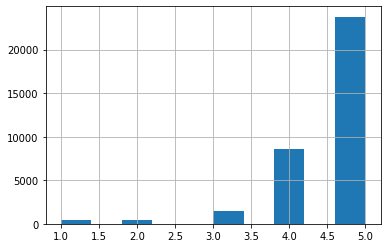

In [ ]:
#let's explore ratings more
print(df_focus['reviews.rating'].value_counts())
df['reviews.rating'].hist()

In [ ]:
#it seems that we will face an imbalance , let's normalized ratings to positive and negatice for now
df_focus["sent"] = df_focus["reviews.rating"]>=4
df_focus["sent"] = df_focus["sent"].replace([True , False] , ["pos" , "neg"])
df_focus.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,reviews.username,reviews.text,reviews.title,reviews.rating,sent
0,Adapter,This product so far has not disappointed. My c...,Kindle,5.0,pos
1,truman,great for beginner or experienced person. Boug...,very fast,5.0,pos
2,DaveZ,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0,pos
3,Shacks,I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0,pos
4,explore42,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0,pos


pos    32309
neg     2311
Name: sent, dtype: int64


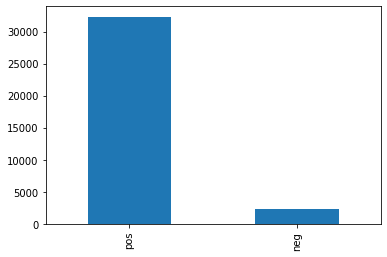

In [ ]:
#let's check senitment distribution
df_focus['sent'].value_counts().plot.bar()
print(df_focus['sent'].value_counts())

In [ ]:
#I will depend on a combination of title and text for training 
#as title also contains some useful words not to miss
df_focus['comb_text'] = df_focus[df_focus.columns[1:3]].apply(
    lambda x: '|'.join(x.astype(str)),
    axis=1)
df_focus.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,reviews.username,reviews.text,reviews.title,reviews.rating,sent,comb_text
0,Adapter,This product so far has not disappointed. My c...,Kindle,5.0,pos,This product so far has not disappointed. My c...
1,truman,great for beginner or experienced person. Boug...,very fast,5.0,pos,great for beginner or experienced person. Boug...
2,DaveZ,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,5.0,pos,Inexpensive tablet for him to use and learn on...
3,Shacks,I've had my Fire HD 8 two weeks now and I love...,Good!!!,4.0,pos,I've had my Fire HD 8 two weeks now and I love...
4,explore42,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,5.0,pos,I bought this for my grand daughter when she c...


In [ ]:
df_focus['comb_text'][0]

'This is the second Kindle Fire 7 we have purchased. This unit was purchased for my wife because she wanted to take pictures and share with family on social media. Compared to another tablet we own, this is by far more superior in quality and performance.|Excellent'

In [ ]:
#as notebooked is being crahsed , i will get only 50% of training data to work on
df_focus = df_focus.sample(frac=.5).reset_index()
df_focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17310 entries, 0 to 17309
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             17310 non-null  int64  
 1   reviews.username  17310 non-null  object 
 2   reviews.text      17310 non-null  object 
 3   reviews.title     17310 non-null  object 
 4   reviews.rating    17310 non-null  float64
 5   sent              17310 non-null  object 
 6   comb_text         17310 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 946.8+ KB


In [ ]:
df_focus.head()

,index,reviews.username,reviews.text,reviews.title,reviews.rating,sent,comb_text
0,21729,SEK79,This is the second Kindle Fire 7 we have purch...,Excellent,5.0,pos,This is the second Kindle Fire 7 we have purch...
1,33774,Altech,Love these firesticks its a very good device l...,Excellent,5.0,pos,Love these firesticks its a very good device l...
2,22513,shockey,its does everything it says with no problems o...,works great,4.0,pos,its does everything it says with no problems o...
3,16133,Techmomma,My 4 year old loves it. I love that she can us...,Awesome,5.0,pos,My 4 year old loves it. I love that she can us...
4,11482,Tinam,Very happy with tablet. Easy to use. Hooks up ...,Great tablet,5.0,pos,Very happy with tablet. Easy to use. Hooks up ...


pos    16122
neg     1188
Name: sent, dtype: int64


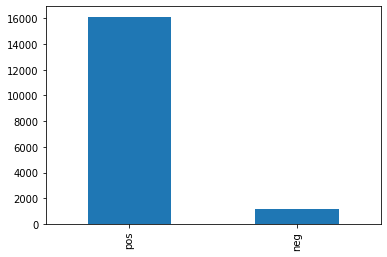

In [ ]:
df_focus['sent'].value_counts().plot.bar()
print(df_focus['sent'].value_counts())

In [ ]:
#as we are dealing mainly with text , it needs special cleaning
#let's make a function to claen our text
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
ps = PorterStemmer()
def clean(text):
  text = str(text).lower()
  text = re.sub('[^a-z]', ' ',text)
  text_list = text.split()
  text_list =  [ps.stem(word) for word in text_list if not word in set(stopwords.words('english')) and len(word) > 1 ]
  text = ' '.join(text_list)
  return text
                                                                     

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import time
tic = time.process_time()
corpus= []
for it in list(df_focus['comb_text']):
    text = clean(it)
    corpus.append(text)
toc = time.process_time()
print('preprocessing time is :'+str(toc-tic)+ 'seconds')


In [ ]:
print('text before preprocessing:',df_focus['comb_text'][0])
print('text after preprocessing:',str(corpus[0]))

text before preprocessing: This is the second Kindle Fire 7 we have purchased. This unit was purchased for my wife because she wanted to take pictures and share with family on social media. Compared to another tablet we own, this is by far more superior in quality and performance.|Excellent
text after preprocessing: second kindl fire purchas unit purchas wife want take pictur share famili social media compar anoth tablet far superior qualiti perform excel


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf = TfidfVectorizer(lowercase=True, min_df=10, norm='l2',ngram_range=(1,2), stop_words='english',token_pattern= u'(?ui)\\b\\w*[a-z]+\\w*\\b')
corpus_tf = tfidf.fit_transform(corpus).toarray()

In [ ]:
corpus_tf.shape

(17310, 4565)

In [ ]:
#let's decrease the number of features for ease of training by limitting the threshold to consider
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf_s = TfidfVectorizer(lowercase=True, min_df=20, norm='l2',ngram_range=(1,2), stop_words='english',token_pattern= u'(?ui)\\b\\w*[a-z]+\\w*\\b')
corpus_tf_s = tfidf_s.fit_transform(corpus).toarray()
corpus_tf_s.shape

(17310, 2360)

In [ ]:
from sklearn.model_selection import train_test_split
x_train0, x_test0, y_train0, y_test0 = train_test_split(corpus_tf,df_focus.sent,test_size =.15,random_state=42)


In [ ]:
print(x_train0.shape)
print(y_train0.shape)

(14713, 4565)
(14713,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
dfs = []
models = [
          ('LogReg', LogisticRegression()), 
          ('NB',GaussianNB()),
          ('SVC',LinearSVC()),
          ('XGB',XGBClassifier())
        ]

results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print(name)
        print(classification_report(y_test, y_pred))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)


LogReg
              precision    recall  f1-score   support

         neg       0.82      0.19      0.31       238
         pos       0.94      1.00      0.97      3224

    accuracy                           0.94      3462
   macro avg       0.88      0.60      0.64      3462
weighted avg       0.94      0.94      0.92      3462

NB
              precision    recall  f1-score   support

         neg       0.13      0.72      0.21       238
         pos       0.97      0.63      0.76      3224

    accuracy                           0.64      3462
   macro avg       0.55      0.68      0.49      3462
weighted avg       0.91      0.64      0.73      3462

SVC
              precision    recall  f1-score   support

         neg       0.65      0.36      0.46       238
         pos       0.95      0.99      0.97      3224

    accuracy                           0.94      3462
   macro avg       0.80      0.67      0.72      3462
weighted avg       0.93      0.94      0.94      3462

XGB
 

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


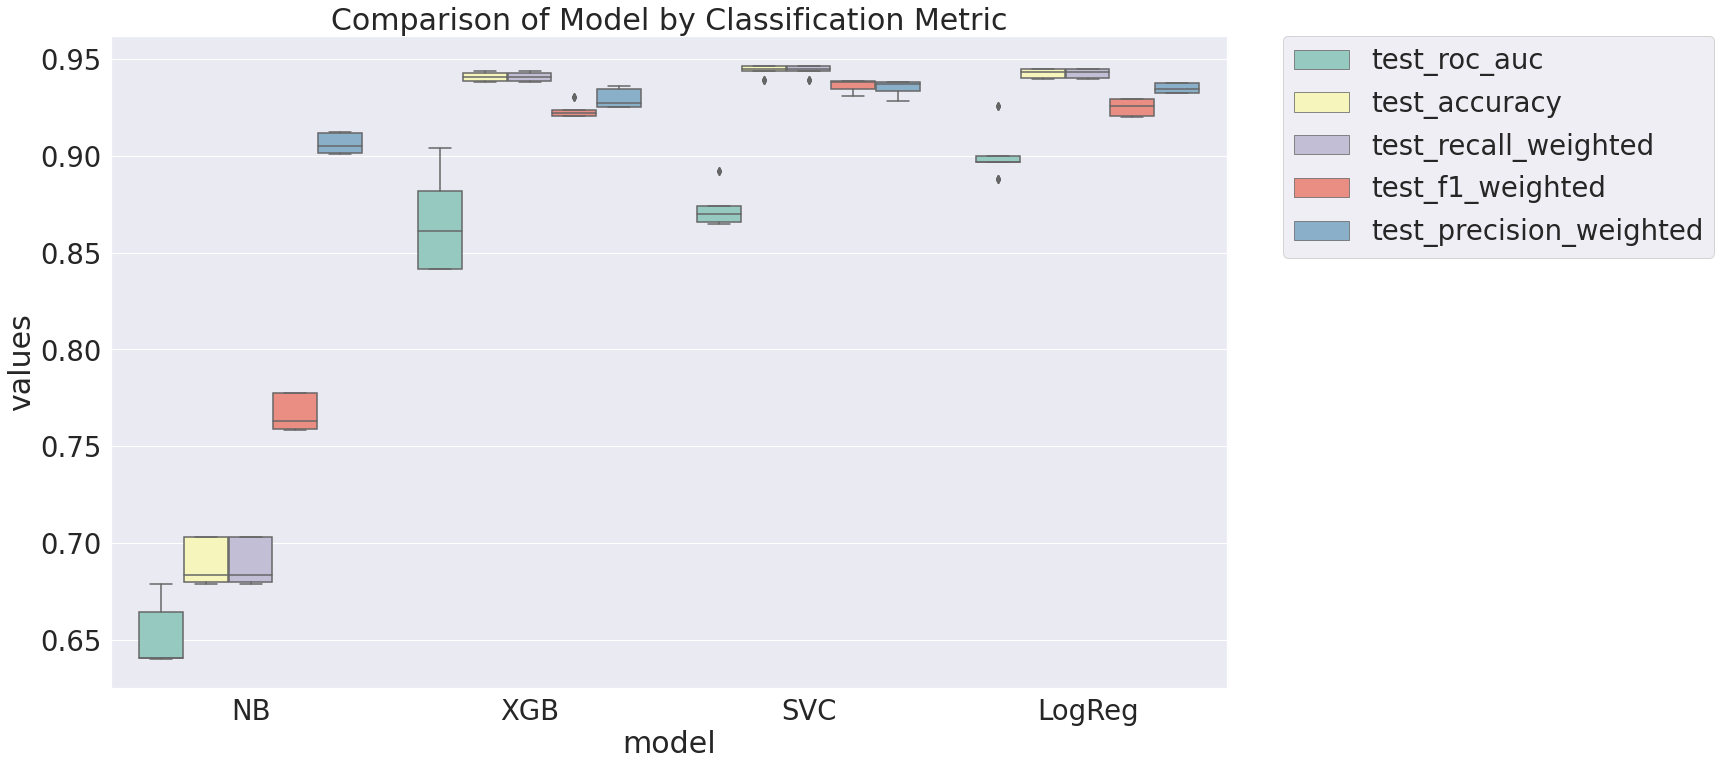

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

#add nefative samples prediction


In [ ]:
#althogh it's clear that svc and logistic regression are best performing
#it seems that the imbalanc is affecting training badly
#i will use smote to obersample the minor class

from imblearn.over_sampling import SMOTE 

x = corpus_tf
y = df_focus['sent'].values

sm = SMOTE(random_state=35,k_neighbors=10)
X_res, y_res = sm.fit_resample(x, y)


In [ ]:
y_res.shape

(32244,)

(array([16122.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16122.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

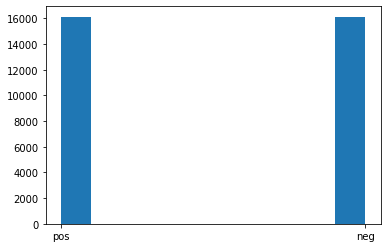

In [ ]:
#let's see how it's ditributed now 
plt.hist(y_res)

In [ ]:
#the balance is clear
# we could test top 2 algortithms now 
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=.2)
print(x_train.shape)
print(y_train.shape)

(25795, 4565)
(25795,)


In [ ]:
dfs = []
models = [
          ('LogReg', LogisticRegression()), 
          ('SVC',LinearSVC()),
        ]

results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        print(name)
        print(classification_report(y_test, y_pred))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)


LogReg
              precision    recall  f1-score   support

         neg       0.90      0.94      0.92      3216
         pos       0.94      0.90      0.92      3245

    accuracy                           0.92      6461
   macro avg       0.92      0.92      0.92      6461
weighted avg       0.92      0.92      0.92      6461

SVC
              precision    recall  f1-score   support

         neg       0.92      0.98      0.95      3216
         pos       0.98      0.91      0.94      3245

    accuracy                           0.95      6461
   macro avg       0.95      0.95      0.95      6461
weighted avg       0.95      0.95      0.95      6461



In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

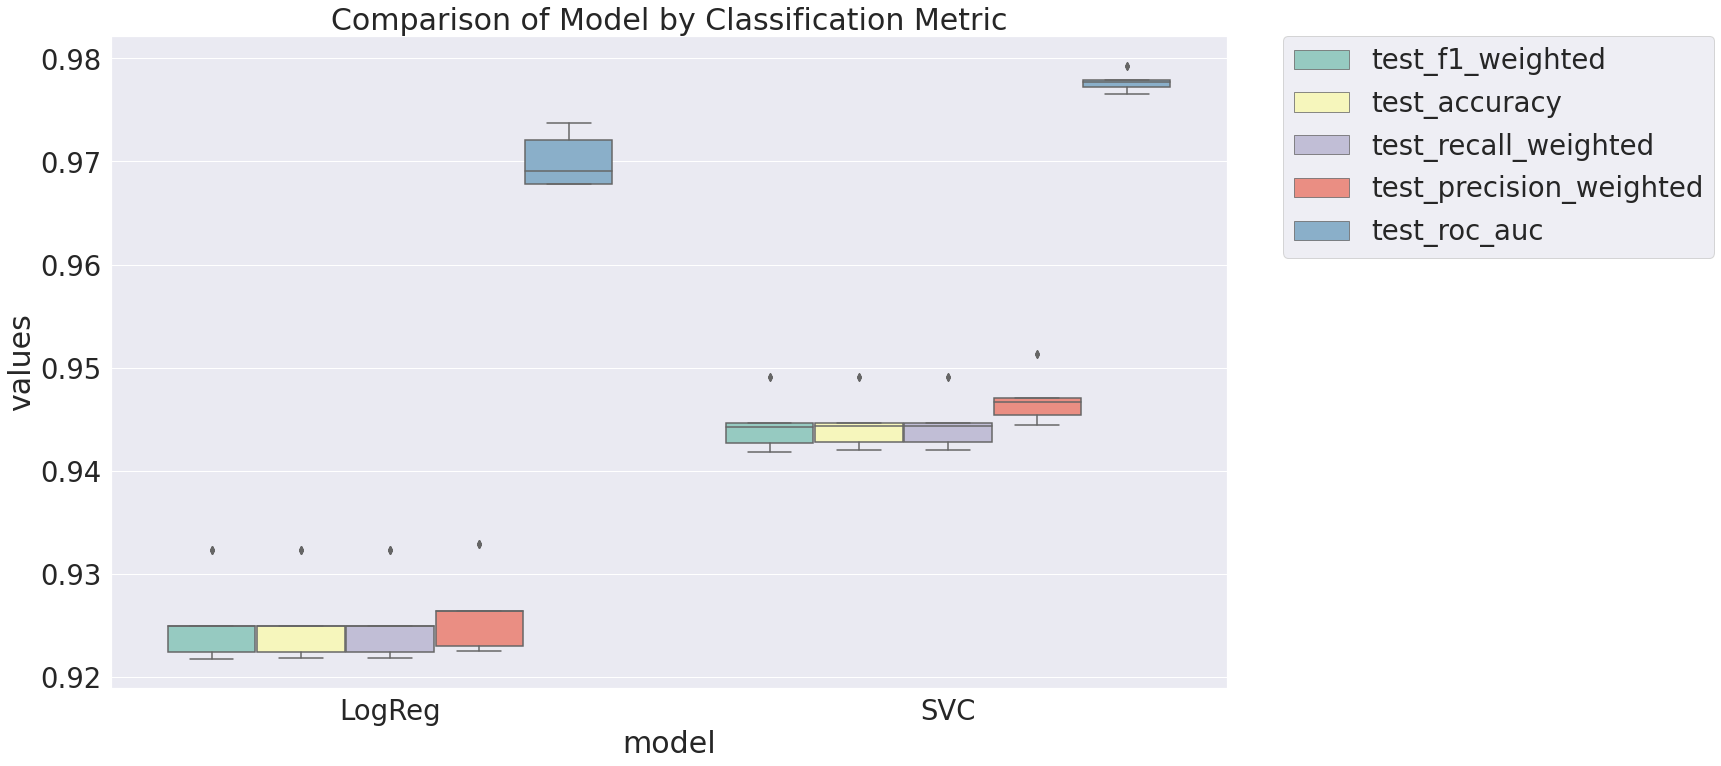

In [ ]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [ ]:
%time
model_svc = LinearSVC()
model_svc.fit(x_train,y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


LinearSVC()

In [ ]:
#as SVC is better at all metrics , we will move forward with it 
#let's use it on manual writtern data
#at first let's build a function

def pred(text):
  text_cln = clean(text)
  text_idf = tfidf.transform([text_cln]).toarray()
  pred = model_svc.predict(text_idf)
  return pred


In [ ]:
pred('''it sucks and has tons of issues''' )


array(['neg'], dtype=object)

In [ ]:
pred(''' the device was extremely annoying as it breaks down so many times ''')
#pred(''' the worst tablet i have ever used''')

array(['neg'], dtype=object)

In [ ]:
pred(''' so bad ''')

array(['neg'], dtype=object)

In [ ]:
pred(''' it's really fantastic device''')

array(['pos'], dtype=object)

In [ ]:
pred(''' what a horrible experience to get such a useless device''')

array(['neg'], dtype=object)

- 